In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.5, random_state=4)

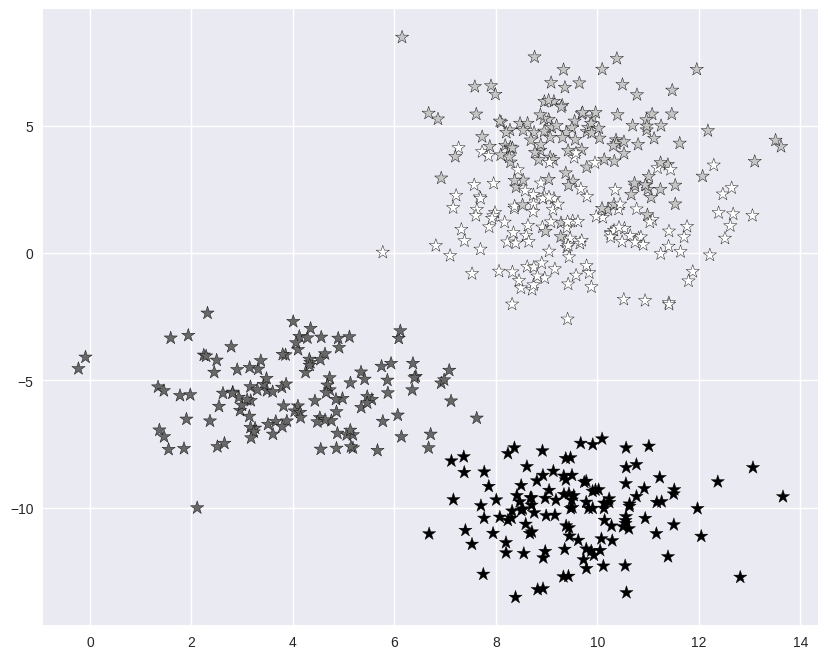

In [5]:
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y,marker='*',s=100,edgecolors='black')
plt.show()